# Height_Detection_Model

/home/abhimanyu/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
QObject::moveToThread: Current thread (0x325eee0) is not the object's thread (0x3abe570).
Cannot move to target thread (0x325eee0)

QObject::moveToThread: Current thread (0x325eee0) is not the object's thread (0x3abe570).
Cannot move to target thread (0x325eee0)

QObject::moveToThread: Current thread (0x325eee0) is not the object's thread (0x3abe570).
Cannot move to target thread (0x325eee0)

QObject::moveToThread: Current thread (0x325eee0) is not the object's thread (0x3abe570).
Cannot move to target thread (0x325eee0)

QObject::moveToThread: Current thread (0x325eee0) is not the object's thread (0x3abe570).
Cannot move to target thread (0x325eee0)

QObject::moveToThread: Current thread (0x325eee0) is not the object's thread (0x3abe570).
Cannot move to target thread

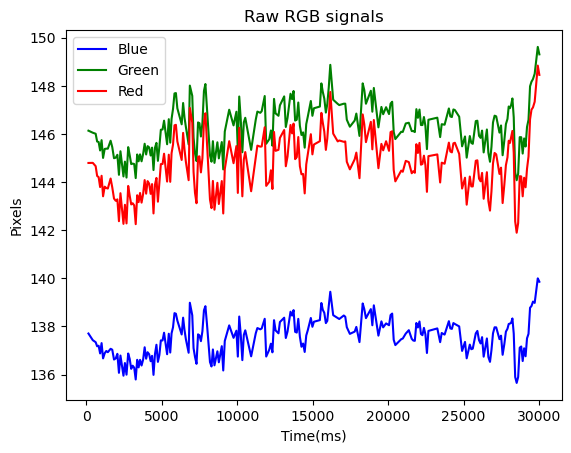

Mode Height of the person: 168 cm
Mode R value: 0.09803921568627451 cm/pixel
Enter the R Value (cm/pixel): 0.09803921568627451
Predicted Height: 168.05437633283404 cm


In [1]:
import cv2
import cv2
import numpy as np
import pandas as pd
import statistics as st
import time
import os
import pickle
import matplotlib.pyplot as plt
from datetime import datetime

# OpenCV Haar cascades for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Matplotlib parameters for real-time plotting
plt.ion()  # Set interactive mode on
fig = plt.figure(1)
plt.xlabel("Time(ms)")
plt.ylabel("Pixels")
plt.title("Raw RGB signals")

# Parameters for storing RGB values
b_plot = []
g_plot = []
r_plot = []
t_plot = []

# Known reference measurements
reference_eye_distance = 10  # in centimeters
typical_eye_to_height_ratio = 1.65  # typical ratio of eye-to-height

# Video file path
video_path = '/media/abhimanyu/AivotAI/Data_Collection_Office/Data_Repo_Abhi/Face_Video/video_Nidhi Tiwari_26102023_1026.avi'

# Initialize video capture from file
cap = cv2.VideoCapture(video_path)

# Timer variables
start_time = time.time()

# Variables for additional information
Name = 'Abhimanyu'
Sub_ID = 2
Age = 26
Gender = "Male"

# Lists for additional information and RGB values
ht = []
R_values = []
names = []
sub_ids = []
ages = []
genders = []

# Duration of video capture in seconds
duration = 30

while True:
    ret, framen = cap.read()
    if not ret:
        break

    frame = cv2.flip(framen, 1)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]

        eyes = eye_cascade.detectMultiScale(roi_gray)

        if len(eyes) == 2:
            (ex1, ey1, ew1, eh1), (ex2, ey2, ew2, eh2) = eyes
            eye_distance_pixels = abs(ex2 - ex1)
            cv2.line(roi_color, (ex1 + ew1 // 2, ey1 + eh1 // 2), (ex2 + ew2 // 2, ey2 + eh2 // 2), (0, 255, 0), 2)

            R = reference_eye_distance / eye_distance_pixels
            R_values.append(R)
            cv2.putText(frame, f'R: {R:.2f} cm/pixel', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            estimated_height_cm = eye_distance_pixels * typical_eye_to_height_ratio
            ht.append(estimated_height_cm)
            cv2.putText(frame, f'Estimated Height: {estimated_height_cm:.2f} cm', (x, y + 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            names.append(Name)
            sub_ids.append(Sub_ID)
            ages.append(Age)
            genders.append(Gender)

            # Append the current frame's RGB to plotting parameters
            b_plot.append(roi_color[:, :, 0].mean())
            g_plot.append(roi_color[:, :, 1].mean())
            r_plot.append(roi_color[:, :, 2].mean())
            t_plot.append(round((time.time() - start_time) * 1000))  # Convert time to milliseconds

    cv2.imshow('Face and Eye Detection', frame)

    if time.time() - start_time >= duration:
        break

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Plotting RGB signals
plt.plot(t_plot, b_plot, 'b', label='Blue')
plt.plot(t_plot, g_plot, 'g', label='Green')
plt.plot(t_plot, r_plot, 'r', label='Red')
plt.legend()
plt.show()

# Calculating mode height and R value
if len(R_values) > 0:
    mode_height = np.bincount(ht).argmax()
    mode_R = st.mode(R_values)
    print(f"Mode Height of the person: {mode_height} cm")
    print(f"Mode R value: {mode_R} cm/pixel")

    # Saving data to Excel
    data = {'Name': names, 'Subject ID': sub_ids, 'Age': ages, 'Gender': genders, 'Height (cm)': ht, 'R Value (cm/pixel)': R_values}
    df = pd.DataFrame(data)
    df.to_excel('output.xlsx', index=False)

    # Predicting height
    with open('/home/abhimanyu/Downloads/Body_Measurement_Model.pkl', 'rb') as f:
        model = pickle.load(f)

    with open('/home/abhimanyu/Downloads/Body_Measurement_Model_scalerX.pkl', 'rb') as f:
        scaler_X = pickle.load(f)

    with open('/home/abhimanyu/Downloads/Body_Measurement_Model_scalerY.pkl', 'rb') as f:
        scaler_Y = pickle.load(f)

    R_value = float(input("Enter the R Value (cm/pixel): "))
    X = np.array([R_value]).reshape(1, -1)
    X_scaled = scaler_X.transform(X)
    predicted_height_scaled = model.predict(X_scaled)
    predicted_height = scaler_Y.inverse_transform(predicted_height_scaled.reshape(1, -1))
    print(f"Predicted Height: {predicted_height[0][0]} cm")
else:
    print("No faces or eyes detected in the video frames.")

# Height_Measure_Through_Video_Path

In [ ]:
import cv2
import numpy as np
import pandas as pd
import statistics as st
import time

# Load the pre-trained face and eye cascade classifiers
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Known reference measurements
reference_eye_distance = 10  # in centimeters
typical_eye_to_height_ratio = 1.65  # typical ratio of eye-to-height

# Video file path
video_path = '/media/abhimanyu/AivotAI/Data_Collection_Office/Data_Repo_Abhi/Face_Video/video_Alok Tiwari_26102023_0950.avi'

ht = []
R_values = []

# Define additional information
Name = 'Prakhar'
Sub_ID = 11
Age = 26
Gender = "Male"

# Create lists to store additional information
names = []
sub_ids = []
ages = []
genders = []

# Initialize video capture from file
cap = cv2.VideoCapture(video_path)

# Timer variables
start_time = time.time()
duration = 20  # 20 seconds

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale for face and eye detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Draw a rectangle around the detected face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Extract the region of interest (ROI) containing the face
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]

        # Detect eyes within the face region
        eyes = eye_cascade.detectMultiScale(roi_gray)

        # Calculate the distance between the eyes
        if len(eyes) == 2:
            (ex1, ey1, ew1, eh1), (ex2, ey2, ew2, eh2) = eyes
            eye_distance_pixels = abs(ex2 - ex1)  # Pixel distance between eyes
            cv2.line(roi_color, (ex1 + ew1 // 2, ey1 + eh1 // 2), (ex2 + ew2 // 2, ey2 + eh2 // 2), (0, 255, 0), 2)

            # Calculate the ratio 'R' for pixel-to-cm conversion
            R = reference_eye_distance / eye_distance_pixels
            R_values.append(R)
            cv2.putText(frame, f'R: {R:.2f} cm/pixel', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            # Estimate height based on typical eye-to-height ratio
            estimated_height_cm = eye_distance_pixels * typical_eye_to_height_ratio
            ht.append(estimated_height_cm)
            cv2.putText(frame, f'Estimated Height: {estimated_height_cm:.2f} cm', (x, y + 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            # Store additional information
            names.append(Name)
            sub_ids.append(Sub_ID)
            ages.append(Age)
            genders.append(Gender)

    # Display the resulting frame
    cv2.imshow('Face and Eye Detection', frame)

    # Check if 20 seconds have passed
    if time.time() - start_time >= duration:
        break

    # Exit loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture
cap.release()
cv2.destroyAllWindows()

# Calculate the mode of the heights
mode_height = np.bincount(ht).argmax()

# Calculate the mode of the R values
mode_R = st.mode(R_values)

# Print the mode height and mode R
print(f"Mode Height of the person: {mode_height} cm")
print(f"Mode R value: {mode_R} cm/pixel")

# Create a DataFrame for the data including additional information
data = {'Name': names, 'Subject ID': sub_ids, 'Age': ages, 'Gender': genders, 'Height (cm)': ht, 'R Value (cm/pixel)': R_values}
df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
df.to_excel('output.xlsx', index=False)

# Height_R_Measurement_Model

In [ ]:
import cv2
import numpy as np
import pandas as pd

# Add the import statement for statistics module
import statistics as st

# Load the pre-trained face and eye cascade classifiers
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Known reference measurements
reference_eye_distance = 10  # in centimeters
typical_eye_to_height_ratio = 1.65  # typical ratio of eye-to-height

# Initialize video capture
cap = cv2.VideoCapture(0)

ht = []
R_values = []

# Timer variables
start_time = cv2.getTickCount()
duration = 30  # in seconds

# Define additional information
Name = 'Abhimanyu'
Sub_ID = 100
Age = 26
Gender = "Male"

# Create lists to store additional information
names = []
sub_ids = []
ages = []
genders = []

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale for face and eye detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Draw a rectangle around the detected face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Extract the region of interest (ROI) containing the face
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]

        # Detect eyes within the face region
        eyes = eye_cascade.detectMultiScale(roi_gray)

        # Calculate the distance between the eyes
        if len(eyes) == 2:
            (ex1, ey1, ew1, eh1), (ex2, ey2, ew2, eh2) = eyes
            eye_distance_pixels = abs(ex2 - ex1)  # Pixel distance between eyes
            cv2.line(roi_color, (ex1 + ew1 // 2, ey1 + eh1 // 2), (ex2 + ew2 // 2, ey2 + eh2 // 2), (0, 255, 0), 2)

            # Calculate the ratio 'R' for pixel-to-cm conversion
            R = reference_eye_distance / eye_distance_pixels
            R_values.append(R)
            cv2.putText(frame, f'R: {R:.2f} cm/pixel', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            # Estimate height based on typical eye-to-height ratio
            estimated_height_cm = eye_distance_pixels * typical_eye_to_height_ratio
            ht.append(estimated_height_cm)
            cv2.putText(frame, f'Estimated Height: {estimated_height_cm:.2f} cm', (x, y + 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            # Store additional information
            names.append(Name)
            sub_ids.append(Sub_ID)
            ages.append(Age)
            genders.append(Gender)

    # Display the resulting frame
    cv2.imshow('Face and Eye Detection', frame)

    # Check if 30 seconds have passed
    current_time = cv2.getTickCount()
    elapsed_time = (current_time - start_time) / cv2.getTickFrequency()
    if elapsed_time >= duration:
        break

    # Exit loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture
cap.release()
cv2.destroyAllWindows()

# Calculate the mode of the heights
mode_height = np.bincount(ht).argmax()

# Calculate the mode of the R values
mode_R = st.mode(R_values)

# Print the mode height and mode R
print(f"Mode Height of the person: {mode_height} cm")
print(f"Mode R value: {mode_R} cm/pixel")

# Create a DataFrame for the data including additional information
data = {'Name': names, 'Subject ID': sub_ids, 'Age': ages, 'Gender': genders, 'Height (cm)': ht, 'R Value (cm/pixel)': R_values}
df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
df.to_excel('output.xlsx', index=False)


# Height_Measurement_Model

In [ ]:
import cv2
import numpy as np
import statistics as st

# Load the pre-trained face and eye cascade classifiers
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Known reference measurements
reference_eye_distance = 10  # in centimeters
typical_eye_to_height_ratio = 1.65  # typical ratio of eye-to-height

# Initialize video capture
cap = cv2.VideoCapture(0)

ht = []
# Timer variables
start_time = cv2.getTickCount()
duration = 30  # in seconds

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale for face and eye detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Draw a rectangle around the detected face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Extract the region of interest (ROI) containing the face
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]

        # Detect eyes within the face region
        eyes = eye_cascade.detectMultiScale(roi_gray)

        # Calculate the distance between the eyes
        if len(eyes) == 2:
            (ex1, ey1, ew1, eh1), (ex2, ey2, ew2, eh2) = eyes
            eye_distance_pixels = abs(ex2 - ex1)  # Pixel distance between eyes
            cv2.line(roi_color, (ex1 + ew1 // 2, ey1 + eh1 // 2), (ex2 + ew2 // 2, ey2 + eh2 // 2), (0, 255, 0), 2)

            # Calculate the ratio 'R' for pixel-to-cm conversion
            R = reference_eye_distance / eye_distance_pixels
            cv2.putText(frame, f'R: {R:.2f} cm/pixel', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            # Estimate height based on typical eye-to-height ratio
            estimated_height_cm = eye_distance_pixels * typical_eye_to_height_ratio
            ht.append(estimated_height_cm)
            cv2.putText(frame, f'Estimated Height: {estimated_height_cm:.2f} cm', (x, y + 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Face and Eye Detection', frame)

    # Check if 30 seconds have passed
    current_time = cv2.getTickCount()
    elapsed_time = (current_time - start_time) / cv2.getTickFrequency()
    if elapsed_time >= duration:
        break

    # Exit loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture
cap.release()
cv2.destroyAllWindows()


# Calculate the mode of the heights
mode_height = np.bincount(ht).argmax()

# Print the mode height of the person
print(f"Mode Height of the person: {mode_height} cm")